# Common similarity and dissimilarity measures: numeric example

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.spatial.distance import euclidean, cityblock
import matplotlib.pyplot as plt

np.random.seed(42)

def plot_all_scenarios(scenarios, titles):
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    for i, (ax, (x, y), title) in enumerate(zip(axs, scenarios, titles)):
        pearson = pearsonr(x, y)[0]
        spearman = spearmanr(x, y)[0]
        kendall = kendalltau(x, y)[0]
        euclid = euclidean(x, y)
        manhat = cityblock(x, y)
        
        # Euclidean and Manhattan distances are also available in scikit-learn:
        # from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

        # Plot data and y=x line
        ax.scatter(x, y)
        ax.plot([1, 10], [1, 10], 'r--', label='y = x')
        ax.set_title(title)
        ax.set_xlim(0, 11)
        ax.set_ylim(min(min(y), 0), max(max(y), 11))
        ax.set_xlabel("x")
        if i == 0:
            ax.set_ylabel("y")
        ax.grid(True)

        # Caption with increased font size
        caption = (
            f"Pearson: {pearson:.2f}\n"
            f"Spearman: {spearman:.2f}\n"
            f"Kendall: {kendall:.2f}\n"
            f"Euclid: {euclid:.2f}\n"
            f"Manhattan: {manhat:.2f}"
        )
        ax.text(0.5, -0.25, caption, transform=ax.transAxes,
                fontsize=20, va='top', ha='center')

    plt.tight_layout()
    plt.show()


Recall that we have the following similary measures:

-  Pearson correlation: This is the "usual" correlation coefficient, and measures the **linear** association between $X_i$ and $X_j$. 
-  Spearman correlation. This is essentially the Pearson correlation applied to **ranked** observations. 
-  Kendall's $\tau$. This correlation coefficient uses directly rankings among pairs of observations. 

and the dissimilarity measures

- Euclidean distance:  sum of squared difference between feature values ($\ell_2$-norm)
    $$ d_E(i,j)= \left[ \sum_{l=1}^p (X_{i,l}-X_{j,l})^2  \right]^{1/2} $$
- Manhattan distance:
	sum of absolute difference between feature values ($\ell_1$-norm)
    $$d_M(i,j)= \sum_{l=1}^p |X_{i,l}-X_{j,l}| $$

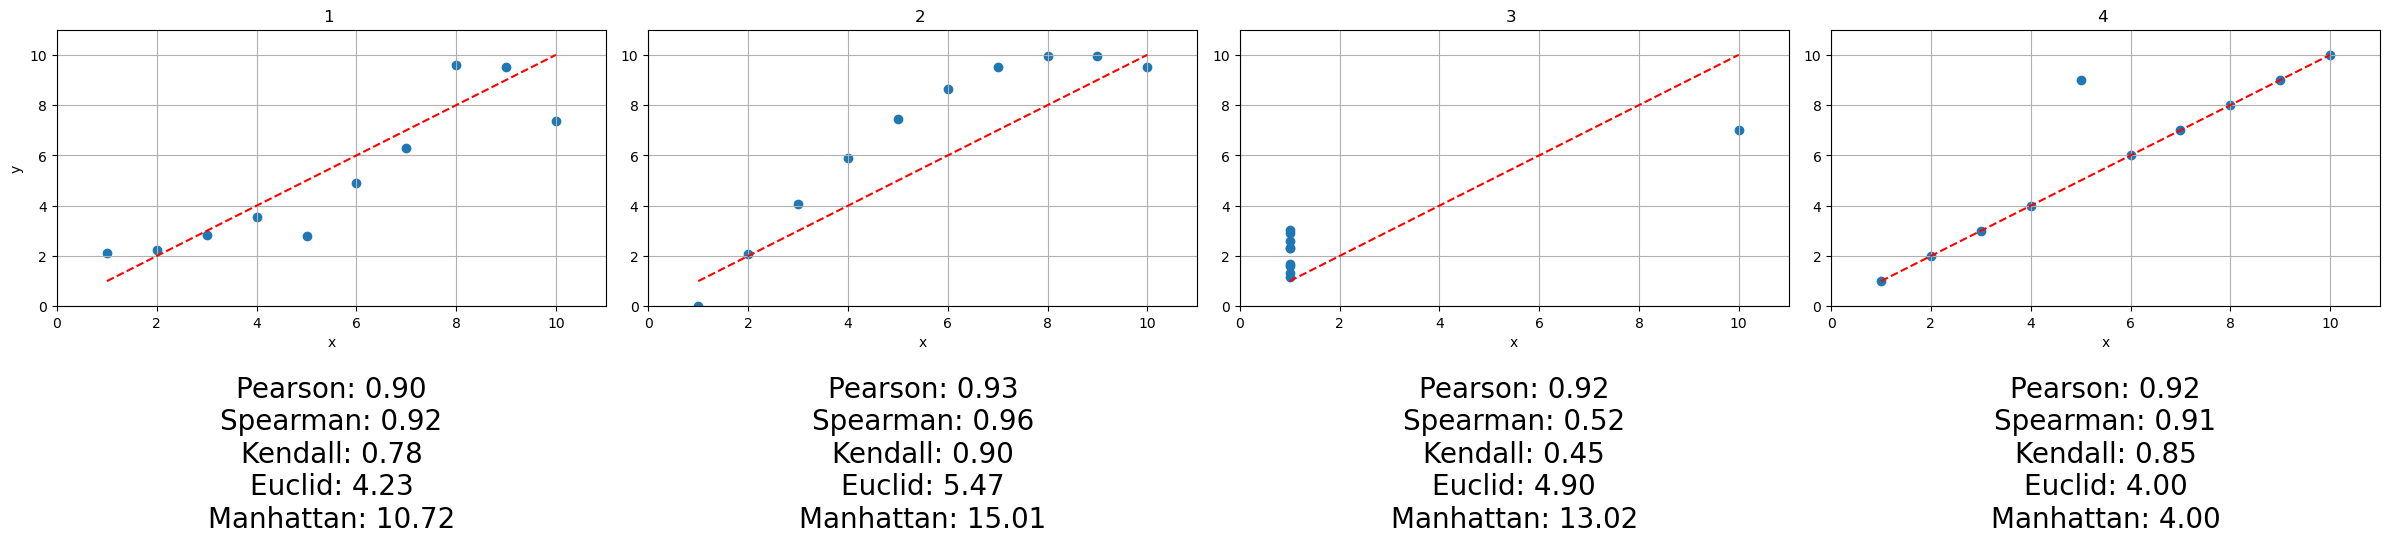

In [8]:
# --- Data Generation ---
x1 = np.arange(1, 11)
y1 = x1 + np.random.normal(0, 1.5, size=10)

x2 = np.arange(1, 11)
y2 = 10*np.sin(np.pi*(x2-1)/15) 

x3 = np.ones(10)
y3 = np.random.normal(2, 1, size=10)
x3[-1] = 10; y3[-1]=7

x4 = np.arange(1, 11)
y4 = x4.copy().astype(float)
y4[4] = 9

scenarios = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
titles = [
    "1 ",
    "2 ",
    "3 ",
    "4 "
]

# --- One-liner to call it ---
plot_all_scenarios(scenarios, titles)
